In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Libraries Used

In [2]:
import numpy as np

#nltk.download()
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.util import ngrams

import pandas as pd

import csv
from collections import Counter
from collections import defaultdict

#!pip install wordcloud
from wordcloud import WordCloud #, STOPWORDS
import matplotlib.pyplot as plt
#stopwords = set(STOPWORDS)

import matplotlib.pyplot as plot

## Reading .csv files

In [3]:
# Reading True.csv
data_true = pd.read_csv('True.csv', error_bad_lines=False);
data_true_text = data_true[['text']]
data_true_text['index'] = data_true_text.index
documents_true = data_true_text
print(list(data_true))
print(len(documents_true))

# Reading Fake.csv
data_fake = pd.read_csv('Fake.csv', error_bad_lines=False);
data_fake_text = data_fake[['text']]
data_fake_text['index'] = data_fake_text.index
documents_fake = data_fake_text
print(list(data_fake))
print(len(documents_fake))

['title', 'text', 'label']
70
['title', 'text', 'label']
70


C:\Users\abhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\abhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [4]:
# First 10 true news articles
# documents_true[:10].style.hide_index().set_properties(subset = ['text'], **{'background-color': 'yellow', 'color': 'green', 'text-align': 'left'}).set_table_styles([dict(selector = 'th', props = [('background-color', 'lightgray'),('color', 'darkblue'),('text-align', 'center'),('font-family','verdana')])])
documents_true[:10].style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#7CAE00'),
             ('color', 'white'),
             ('font-family','verdana')]},
 
 {'selector': 'td', 
  'props': [('font-family','verdana')]},
 
 {'selector': 'tr:nth-of-type(odd)', 
  'props': [('background', '#DCDCDC')]},
 
 {'selector': 'tr:nth-of-type(even)', 
  'props': [('background', 'white')]},
]
).hide_index()#.highlight_null(null_color = 'red')

In [5]:
# First 10 fake news articles
# documents_fake.iloc[0, 1] = np.nan
documents_fake[:10].style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#7CAE00'),
             ('color', 'white'),
             ('font-family','verdana')]},
 
 {'selector': 'td', 
  'props': [('font-family','verdana')]},
 
 {'selector': 'tr:nth-of-type(odd)', 
  'props': [('background', '#DCDCDC')]},
 
 {'selector': 'tr:nth-of-type(even)', 
  'props': [('background', 'white')]},
]
).hide_index()#.highlight_null(null_color = 'red')

text,index
"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",0
"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former aide set up meetings with world leaders for Trump, but team Trump ran with him being merely a coffee boy.In May 2016, Papadopoulos revealed to Australian diplomat Alexander Do

## Data Preprocessing

In [6]:
wnlem = WordNetLemmatizer()
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

#### Lemmatize Example

In [7]:
past_future_forms = ['had', 'gone', 'gave', 'handled', 'died', 'cared', 'done', 'wants']
present_form = [wnlem.lemmatize(pas_fut, pos='v') for pas_fut in past_future_forms]
pd.DataFrame(data = {'Past/Future forms': past_future_forms, 'Present form': present_form}).style.hide_index()

Past/Future forms,Present form
had,have
gone,go
gave,give
handled,handle
died,die
cared,care
done,do
wants,want


#### Stemmer Example

In [8]:
original_words = ["Ram's", "Sham's", 'caresses', 'flies', 'dies', 'mules', 'denied','died', 'agreed', 'owned', 
           'humbled', 'sized','meeting', 'stating', 'siezing', 'itemization','sensational', 
           'traditional', 'reference', 'colonizer','plotted']
singles = [stemmer.stem(plural) for plural in original_words]
pd.DataFrame(data = {'original word': original_words, 'stemmed': singles}).style.hide_index()

original word,stemmed
Ram's,ram
Sham's,sham
caresses,caress
flies,fli
dies,die
mules,mule
denied,deni
died,die
agreed,agre
owned,own


#### Tokenize and Removing Stop Words Example

In [9]:
example_sent = '"This is a sample sentence, showing off the stop words filteration."'
print(example_sent)
print('\nThe stop words in nltk are as follows:\n',stop_words)
word_tokens = word_tokenize(example_sent)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
print('\nThe word tokens in example sentence are:',word_tokens)
print('\nThe filtered sentence corresponding to example sentence is:',filtered_sentence)

"This is a sample sentence, showing off the stop words filteration."

The stop words in nltk are as follows:
 {'yourselves', 'this', 'by', 'up', 'of', 'again', 'it', 'during', 'when', 'than', 'hers', 'for', 'mustn', 'needn', 'been', 'what', 'having', 'if', 'themselves', 'theirs', 'with', 'below', 'all', 'until', 'my', 'isn', 'which', 'about', 'were', 'won', "shouldn't", 'as', 'be', 'do', 'because', 'yours', 'didn', 'aren', 'o', 'are', "couldn't", "you're", 'so', 'most', 'here', 'hasn', "don't", "you'll", 'before', 'a', "aren't", 'its', 'his', 'ma', 's', 'd', 'off', 'don', 'there', 'those', 'does', 'yourself', 'in', 'out', "should've", 'couldn', 'who', "won't", "she's", 'the', 'shouldn', "shan't", 'further', 'your', "you've", 'y', 'some', 'now', 'had', 'not', 'herself', 'each', 'itself', 'other', 'i', 'while', 'them', 'on', 'such', 'him', "weren't", "hasn't", "hadn't", 'same', 'her', 'against', 'did', 've', "wasn't", 'or', 'myself', 'above', 'from', 'll', "you'd", "that'll", 'then', 'ou

### Lemmatization, Stemming, Tokenization and Removing Stop Words

In [10]:
def lemmatize_stemming(text):
    return stemmer.stem(wnlem.lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    try:
        #text = text[:300]   For summarisation of news articles using letters
        for token in word_tokenize(text):
            if token not in stop_words and len(token) > 3:
                result.append(lemmatize_stemming(token))
        result = result[:300]  # For summarisation of news articles using words      
    except:
        pass  # for empty entries
    return result

### Preprocessing on Sample Document(s)

In [11]:
# Sample document from True.csv
doc_sample_true = documents_true[documents_true['index'] == 2].values[0][0]

print('original true sample document: ')
words_true = []
try:
    for word in doc_sample_true.split(' '):
        words_true.append(word)
except:
    pass
print(words_true)
print('\n\n preprocessed true sample document: ')
print(preprocess(doc_sample_true))

# Sample document from Fake.csv
doc_sample_fake = documents_fake[documents_fake['index'] == 4].values[0][0]

print('\n\n original fake sample document: ')
words_fake = []
try:
    for word in doc_sample_fake.split(' '):
        words_fake.append(word)
except:
    pass
print(words_fake)
print('\n\n preprocessed fake sample document: ')
print(preprocess(doc_sample_fake))

original true sample document: 
['WASHINGTON', '(Reuters)', '-', 'The', 'special', 'counsel', 'investigation', 'of', 'links', 'between', 'Russia', 'and', 'President', 'Trump’s', '2016', 'election', 'campaign', 'should', 'continue', 'without', 'interference', 'in', '2018,', 'despite', 'calls', 'from', 'some', 'Trump', 'administration', 'allies', 'and', 'Republican', 'lawmakers', 'to', 'shut', 'it', 'down,', 'a', 'prominent', 'Republican', 'senator', 'said', 'on', 'Sunday.', 'Lindsey', 'Graham,', 'who', 'serves', 'on', 'the', 'Senate', 'armed', 'forces', 'and', 'judiciary', 'committees,', 'said', 'Department', 'of', 'Justice', 'Special', 'Counsel', 'Robert', 'Mueller', 'needs', 'to', 'carry', 'on', 'with', 'his', 'Russia', 'investigation', 'without', 'political', 'interference.', '“This', 'investigation', 'will', 'go', 'forward.', 'It', 'will', 'be', 'an', 'investigation', 'conducted', 'without', 'political', 'influence,”', 'Graham', 'said', 'on', 'CBS’s', 'Face', 'the', 'Nation', 'news'

In [12]:
# Preprocessing for true news articles
processed_true_docs = documents_true['text'].map(preprocess)

# Preprocessing for fake news articles
processed_fake_docs = documents_fake['text'].map(preprocess)

In [13]:
# First 10 preprocessed true news articles
print(processed_true_docs[:10])

# First 10 preprocessed fake news articles
processed_fake_docs[:10]

0    [washington, reuter, head, conserv, republican...
1    [washington, reuter, transgend, peopl, allow, ...
2    [washington, reuter, special, counsel, investi...
3    [washington, reuter, trump, campaign, advis, g...
4    [seattle/washington, reuter, presid, donald, t...
5    [west, palm, beach, fla./washington, reuter, w...
6    [west, palm, beach, reuter, presid, donald, tr...
7    [follow, statement, post, verifi, twitter, acc...
8    [follow, statement, post, verifi, twitter, acc...
9    [washington, reuter, alabama, secretari, state...
Name: text, dtype: object


0    [donald, trump, wish, american, happi, year, l...
1    [hous, intellig, committe, chairman, devin, nu...
2    [friday, reveal, former, milwauke, sheriff, da...
3    [christma, donald, trump, announc, would, back...
4    [pope, franci, use, annual, christma, messag, ...
5    [number, case, cop, brutal, kill, peopl, color...
6    [donald, trump, spend, good, portion, golf, cl...
7    [wake, anoth, court, decis, derail, donald, tr...
8    [mani, peopl, rais, alarm, regard, fact, donal...
9    [just, might, think, break, watch, peopl, kiss...
Name: text, dtype: object

# Case Study Unigram Word Frequecies, Cumulative Term Frequencies and Cumulative Document Frequencies

## Word Frequency and Word Clouds

In [14]:
# defining Word Cloud

def show_wordcloud(data, title = None):
    if not preprocess(data):
        pass
    else:
        data = ' '.join(preprocess(data))
        wordcloud = WordCloud(
            background_color='white',
            stopwords=stop_words,
            max_words=100,
            max_font_size=25, 
            scale=3,
            random_state=1 # chosen at random by flipping a coin; it was heads
        ).generate(str(data))

        fig = plt.figure(1, figsize=(12, 12))
        plt.axis('off')
        if title: 
            fig.suptitle(title, fontsize=20)
            fig.subplots_adjust(top=2.3)

        plt.imshow(wordcloud)
        plt.show()

In [15]:
# Calculating Word Frequencies for words from true news articles
words = []
with open('True.csv',encoding = "utf8") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        csv_words = preprocess(row[1])
        for i in csv_words:
            words.append(i)
            
words_counted = []

for i in words:
    x = words.count(i)
    words_counted.append((i,x))
words_counted = set(words_counted)
words_counted = list(words_counted)
words_counted.sort(key = lambda x:x[1], reverse = True)
val = [x for (i,x) in words_counted]
print('{} words were found in the corpus'.format(sum(val)))
print("The unique identified words with their corresponding word frequencies for top 50 words from true news articles are given below:")
N = 0
for (i,x) in words_counted:
    print('\t',i,'  ({})'.format(x))
    N+=1
    if N == 50:
        break

14440 words were found in the corpus
The unique identified words with their corresponding word frequencies for top 50 words from true news articles are given below:
	 say   (294)
	 trump   (238)
	 u.s.   (164)
	 republican   (140)
	 democrat   (132)
	 state   (111)
	 hous   (107)
	 would   (103)
	 presid   (102)
	 year   (93)
	 bill   (88)
	 reuter   (86)
	 senat   (84)
	 court   (71)
	 also   (69)
	 elect   (62)
	 donald   (58)
	 administr   (58)
	 feder   (58)
	 washington   (56)
	 govern   (55)
	 congress   (51)
	 judg   (50)
	 rule   (49)
	 immigr   (49)
	 offic   (48)
	 repres   (46)
	 make   (46)
	 program   (46)
	 depart   (45)
	 mueller   (44)
	 could   (44)
	 white   (44)
	 vote   (43)
	 investig   (43)
	 statement   (41)
	 includ   (41)
	 unit   (40)
	 lawmak   (39)
	 thursday   (39)
	 parti   (39)
	 legisl   (39)
	 countri   (38)
	 week   (38)
	 campaign   (37)
	 offici   (37)
	 spend   (37)
	 wednesday   (36)
	 time   (36)
	 last   (36)




Word Cloud for document 1


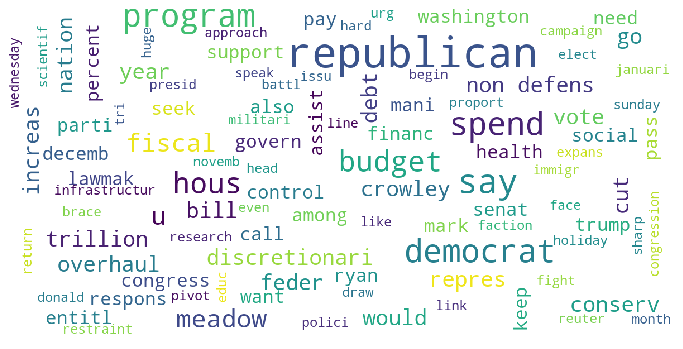



Word Cloud for document 2


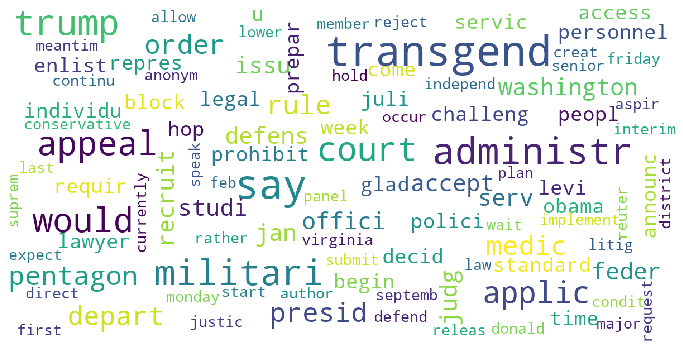



Word Cloud for document 3


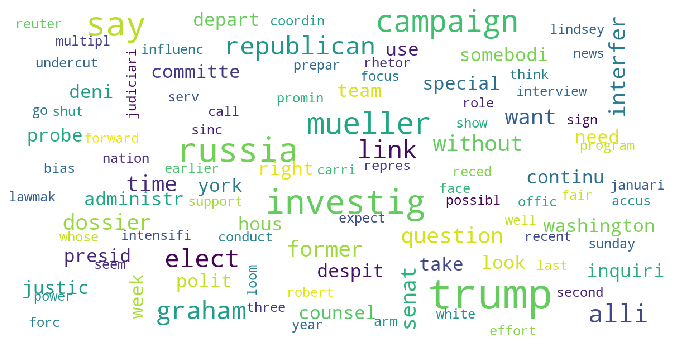



Word Cloud for document 4


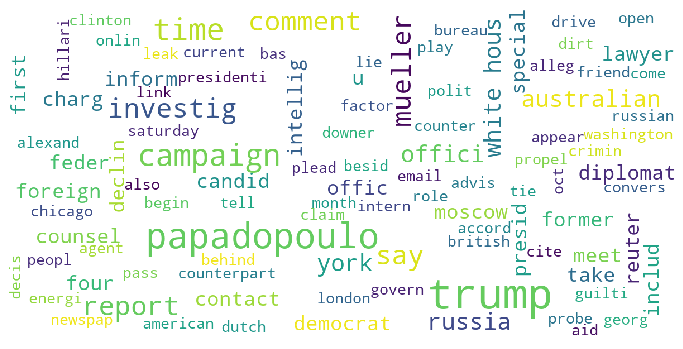



Word Cloud for document 5


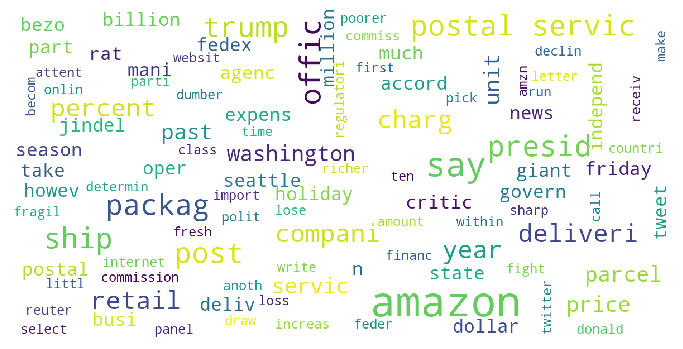



Word Cloud for document 6


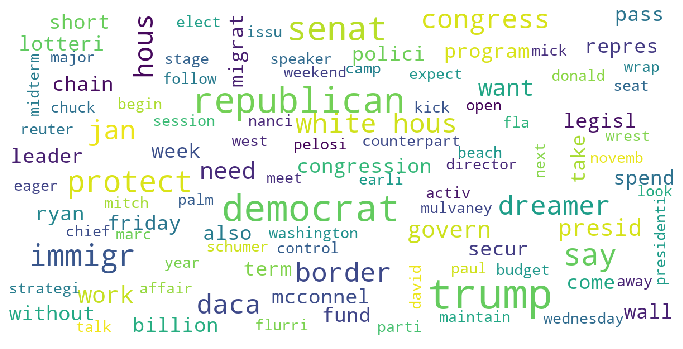



Word Cloud for document 7


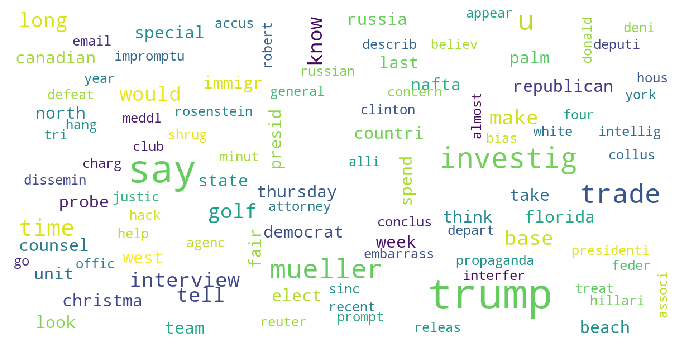



Word Cloud for document 8


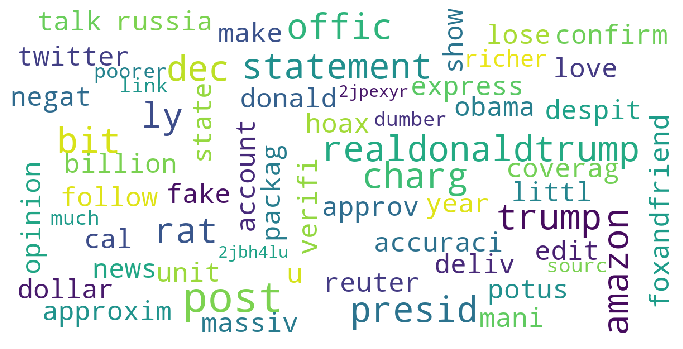



Word Cloud for document 9


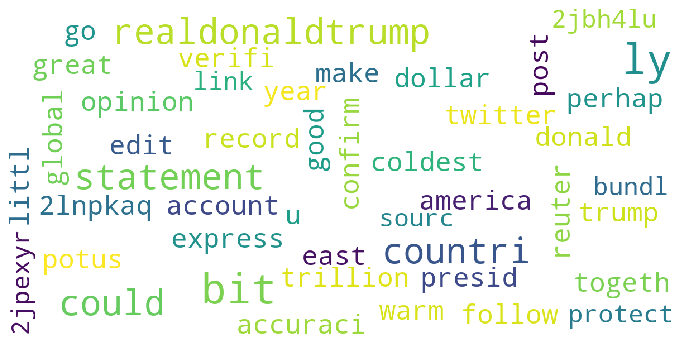



Word Cloud for document 10


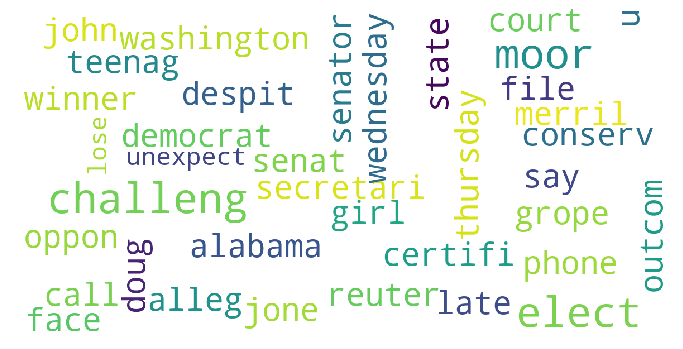

In [16]:
# Plotting Word Clouds for first 10 true news articles
with open('True.csv',encoding = "utf8") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    N = 0
    for row in reader:
        print("\n\nWord Cloud for document {}".format(N+1))
        show_wordcloud(row[1])
        N+=1
        if N == 10:
            break

In [17]:
# Calculating Word Frequencies for words from fake news articles
words =[]
with open('Fake.csv',encoding = "utf8") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        csv_words = preprocess(row[1])
        for i in csv_words:
            words.append(i)
            
words_counted = []

for i in words:
    x = words.count(i)
    words_counted.append((i,x))
words_counted = set(words_counted)
words_counted = list(words_counted)
words_counted.sort(key = lambda x:x[1], reverse = True)
val = [x for (i,x) in words_counted]
print('\n \n{} words were found in the corpus'.format(sum(val)))
print("The unique identified words with their corresponding word frequencies for top 50 words from fake news articles are given below:")
N = 0
for (i,x) in words_counted:
    print('\t',i,'  ({})'.format(x))
    N+=1
    if N == 50:
        break


 
14437 words were found in the corpus
The unique identified words with their corresponding word frequencies for top 50 words from fake news articles are given below:
	 trump   (416)
	 decemb   (120)
	 donald   (119)
	 presid   (116)
	 time   (96)
	 imag   (94)
	 say   (91)
	 year   (82)
	 like   (72)
	 peopl   (71)
	 novemb   (70)
	 make   (69)
	 tweet   (66)
	 moor   (62)
	 senat   (62)
	 white   (60)
	 even   (58)
	 flynn   (57)
	 call   (54)
	 take   (54)
	 know   (54)
	 former   (52)
	 would   (52)
	 american   (50)
	 hous   (50)
	 republican   (50)
	 news   (47)
	 state   (41)
	 go   (41)
	 think   (40)
	 nation   (40)
	 alabama   (38)
	 mueller   (37)
	 also   (37)
	 twitter   (36)
	 come   (36)
	 offic   (36)
	 investig   (35)
	 campaign   (35)
	 person   (35)
	 countri   (35)
	 america   (35)
	 well   (35)
	 https   (34)
	 support   (34)
	 first   (33)
	 parti   (32)
	 right   (32)
	 democrat   (31)
	 want   (31)




Word Cloud for document 1


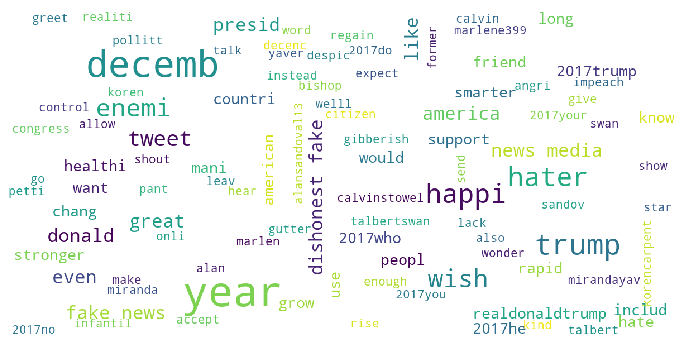



Word Cloud for document 2


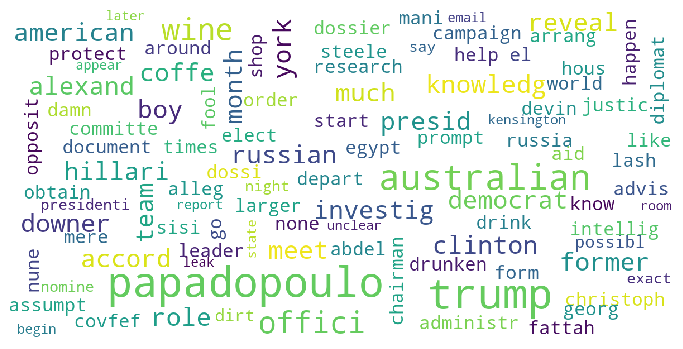



Word Cloud for document 3


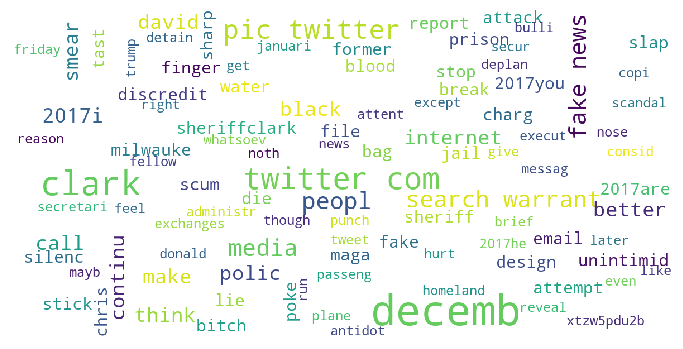



Word Cloud for document 4


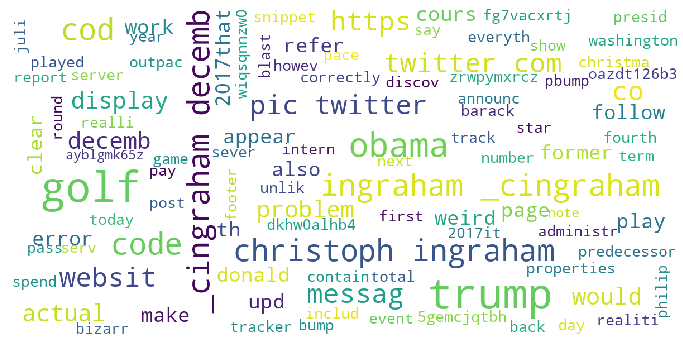



Word Cloud for document 5


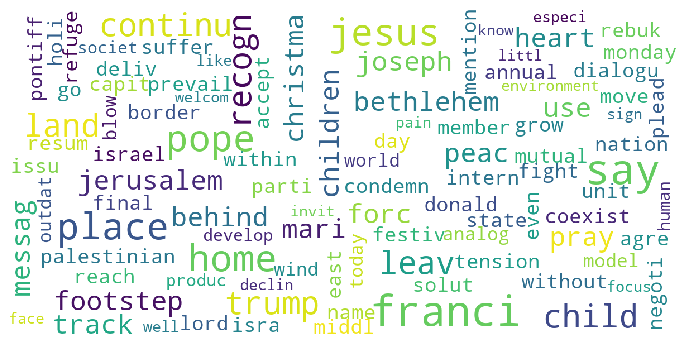



Word Cloud for document 6


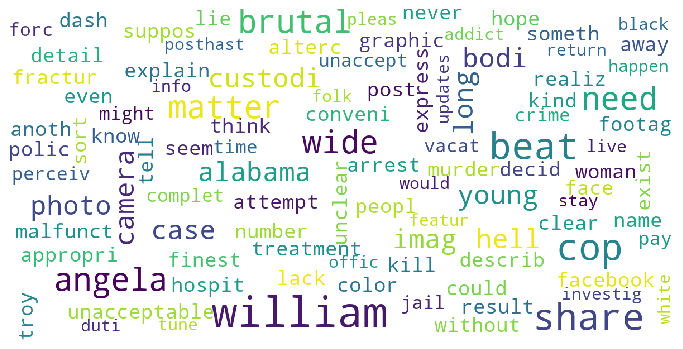



Word Cloud for document 7


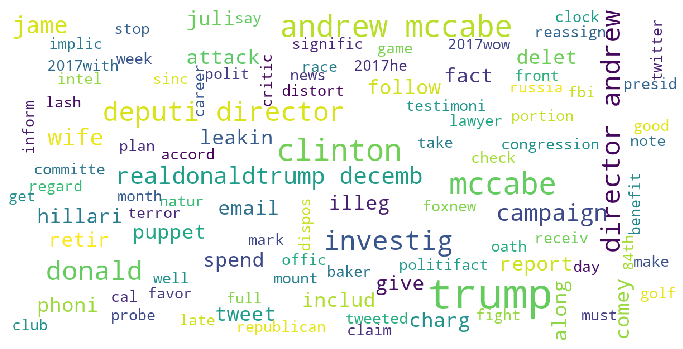



Word Cloud for document 8


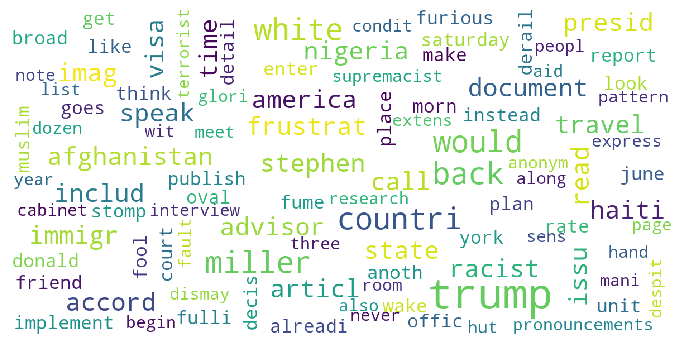



Word Cloud for document 9


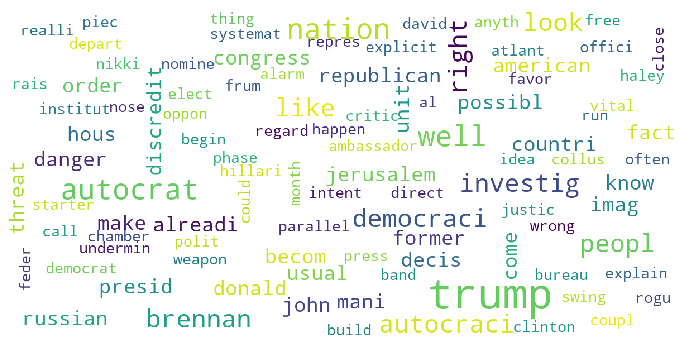



Word Cloud for document 10


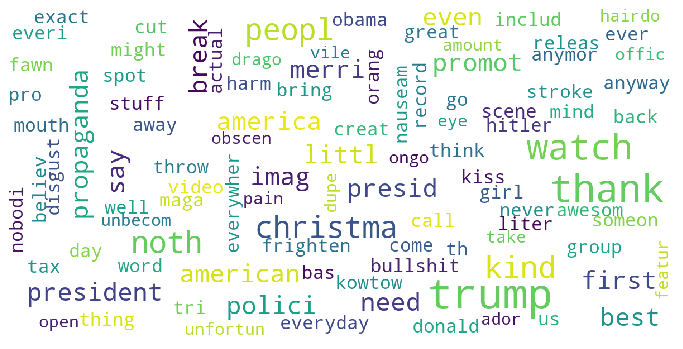

In [18]:
# Plotting Word Clouds for first 10 fake news articles
with open('Fake.csv',encoding = "utf8") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    N = 0
    for row in reader:
        print("\n\nWord Cloud for document {}".format(N+1))
        show_wordcloud(row[1])
        N+=1
        if N == 10:
            break

## Cumulative Term Frequency and Cumulative Document Frequency

In [19]:
# Calculation of Cumulative Term Frequencies and Cumulative Document Frequecies for words from true news articles
with open('True.csv',encoding = "utf8") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    words_true_ctf_dict = {}
    words_true_cdf_dict = {}
    l = 0
    for row in reader:
        l += 1
        csv_words = preprocess(row[1])
        csv_words_tf = []
        for i in csv_words:
            x = csv_words.count(i)
            csv_words_tf.append((i,x/float(len(csv_words))))
        csv_words_tf = set(csv_words_tf)
        for (i,x) in csv_words_tf:
            words_true_ctf_dict[i] = words_true_ctf_dict.get(i,0) + x
            words_true_cdf_dict[i] = words_true_cdf_dict.get(i,0) + 1
    for k, v in words_true_cdf_dict.items():
        words_true_cdf_dict[k] = v/(float(l))
    words_true_ctf_lst = [(k, v) for k, v in words_true_ctf_dict.items()]
    words_true_ctf_lst.sort(key = lambda x:x[1], reverse = True)
    ctf_true_lst = words_true_ctf_lst[:35]
    words_true_cdf_lst = [(k, v) for k, v in words_true_cdf_dict.items()]
    words_true_cdf_lst.sort(key = lambda x:x[1], reverse = True)
    cdf_true_lst = words_true_cdf_lst[:35]
    ctf_true = pd.DataFrame({'Word': [k for (k,v) in ctf_true_lst], 'Cumulative Term Frequency *': [v for (k,v) in ctf_true_lst], 'Cumulative Document Frequency': [words_true_cdf_dict[k] for (k,v) in ctf_true_lst]})
    cdf_true = pd.DataFrame({'Word': [k for (k,v) in cdf_true_lst], 'Cumulative Term Frequency': [words_true_ctf_dict[k] for (k,v) in cdf_true_lst], 'Cumulative Document Frequency *': [v for (k,v) in cdf_true_lst]})
    
# Calculation of Cumulative Term Frequencies and Cumulative Document Frequecies for words from fake news articles
with open('Fake.csv',encoding = "utf8") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    words_fake_ctf_dict = {}
    words_fake_cdf_dict = {}
    l = 0
    for row in reader:
        l += 1
        csv_words = preprocess(row[1])
        csv_words_tf = []
        for i in csv_words:
            x = csv_words.count(i)
            csv_words_tf.append((i,x/float(len(csv_words))))
        csv_words_tf = set(csv_words_tf)
        for (i,x) in csv_words_tf:
            words_fake_ctf_dict[i] = words_fake_ctf_dict.get(i,0) + x
            words_fake_cdf_dict[i] = words_fake_cdf_dict.get(i,0) + 1
    for k, v in words_fake_cdf_dict.items():
        words_fake_cdf_dict[k] = v/(float(l))
    words_fake_ctf_lst = [(k, v) for k, v in words_fake_ctf_dict.items()]
    words_fake_ctf_lst.sort(key = lambda x:x[1], reverse = True)
    ctf_fake_lst = words_fake_ctf_lst[:35]
    words_fake_cdf_lst = [(k, v) for k, v in words_fake_cdf_dict.items()]
    words_fake_cdf_lst.sort(key = lambda x:x[1], reverse = True)
    cdf_fake_lst = words_fake_cdf_lst[:35]
    ctf_fake = pd.DataFrame({'Word': [k for (k,v) in ctf_fake_lst], 'Cumulative Term Frequency *': [v for (k,v) in ctf_fake_lst], 'Cumulative Document Frequency': [words_fake_cdf_dict[k] for (k,v) in ctf_fake_lst]})
    cdf_fake = pd.DataFrame({'Word': [k for (k,v) in cdf_fake_lst], 'Cumulative Term Frequency': [words_fake_ctf_dict[k] for (k,v) in cdf_fake_lst], 'Cumulative Document Frequency *': [v for (k,v) in cdf_fake_lst]})

In [20]:
# df1.style.apply(lambda x: ['background: red' if x < 0 else "background: green" for x in df1], axis = 0)
print("The cumulative Term Frequency in Descending Order for true news articles is given by:")
ctf_true.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'skyblue'),
             ('color', 'purple'),
             ('text-align', 'center'),
             ('font-family','verdana')]},
 
 {'selector': 'td', 
  'props': [('font-family','verdana')]},
 
 {'selector': 'tr:nth-of-type(odd)', 
  'props': [('background', '#DCDCDC')]},
 
 {'selector': 'tr:nth-of-type(even)', 
  'props': [('background', 'white')]},
]
).hide_index().set_properties(subset = ['Word'], **{'text-align': 'left'})

The cumulative Term Frequency in Descending Order for true news articles is given by:


Word,Cumulative Term Frequency *,Cumulative Document Frequency
say,1.265629,0.800000
trump,1.120517,0.814286
u.s.,0.997136,0.914286
republican,0.643251,0.642857
democrat,0.610889,0.542857
hous,0.610380,0.514286
reuter,0.594881,1.000000
bill,0.524825,0.385714
state,0.524347,0.600000
presid,0.522883,0.785714


In [21]:
print("The Cumulative Document Frequency in Descending Order for true news articles is given by:")
cdf_true.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'skyblue'),
             ('color', 'purple'),
             ('text-align', 'center'),
             ('font-family','verdana')]},
 
 {'selector': 'td', 
  'props': [('font-family','verdana')]},
 
 {'selector': 'tr:nth-of-type(odd)', 
  'props': [('background', '#DCDCDC')]},
 
 {'selector': 'tr:nth-of-type(even)', 
  'props': [('background', 'white')]},
]
).hide_index().set_properties(subset = ['Word'], **{'text-align': 'left'})

The Cumulative Document Frequency in Descending Order for true news articles is given by:


Word,Cumulative Term Frequency,Cumulative Document Frequency *
reuter,0.594881,1.000000
u.s.,0.997136,0.914286
trump,1.120517,0.814286
donald,0.344988,0.800000
say,1.265629,0.800000
presid,0.522883,0.785714
would,0.476001,0.642857
republican,0.643251,0.642857
year,0.448581,0.642857
washington,0.358601,0.628571


In [22]:
print("The cumulative Term Frequency in Descending Order for fake news articles is given by:")
ctf_fake.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'skyblue'),
             ('color', 'purple'),
             ('text-align', 'center'),
             ('font-family','verdana')]},
 
 {'selector': 'td', 
  'props': [('font-family','verdana')]},
 
 {'selector': 'tr:nth-of-type(odd)', 
  'props': [('background', '#DCDCDC')]},
 
 {'selector': 'tr:nth-of-type(even)', 
  'props': [('background', 'white')]},
]
).hide_index().set_properties(subset = ['Word'], **{'text-align': 'left'})

The cumulative Term Frequency in Descending Order for fake news articles is given by:


Word,Cumulative Term Frequency *,Cumulative Document Frequency
trump,2.078983,0.914286
donald,0.564057,0.828571
presid,0.514125,0.671429
imag,0.501383,0.814286
decemb,0.500716,0.457143
say,0.485367,0.657143
time,0.423854,0.542857
year,0.358735,0.385714
like,0.357835,0.557143
peopl,0.356251,0.542857


In [23]:
print("The Cumulative Document Frequency in Descending Order for fake news articles is given by:")
cdf_fake.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'skyblue'),
             ('color', 'purple'),
             ('text-align', 'center'),
             ('font-family','verdana')]},
 
 {'selector': 'td', 
  'props': [('font-family','verdana')]},
 
 {'selector': 'tr:nth-of-type(odd)', 
  'props': [('background', '#DCDCDC')]},
 
 {'selector': 'tr:nth-of-type(even)', 
  'props': [('background', 'white')]},
]
).hide_index().set_properties(subset = ['Word'], **{'text-align': 'left'})

The Cumulative Document Frequency in Descending Order for fake news articles is given by:


Word,Cumulative Term Frequency,Cumulative Document Frequency *
trump,2.078983,0.914286
donald,0.564057,0.828571
imag,0.501383,0.814286
presid,0.514125,0.671429
say,0.485367,0.657143
make,0.328401,0.585714
like,0.357835,0.557143
peopl,0.356251,0.542857
time,0.423854,0.542857
know,0.288821,0.514286


## Net Cumulative Term Frequency and Net Cumulative Document Frequency

In [24]:
words_net_ctf_dict = {}
words_net_cdf_dict = {}
for k, v in words_true_ctf_dict.items():
    words_net_ctf_dict[k] = words_net_ctf_dict.get(k,0) + words_true_ctf_dict[k]
for k, v in words_fake_ctf_dict.items():
    words_net_ctf_dict[k] = words_net_ctf_dict.get(k,0) - words_fake_ctf_dict[k]
for k, v in words_true_cdf_dict.items():
    words_net_cdf_dict[k] = words_net_cdf_dict.get(k,0) + words_true_cdf_dict[k]
for k, v in words_fake_cdf_dict.items():
    words_net_cdf_dict[k] = words_net_cdf_dict.get(k,0) - words_fake_cdf_dict[k]
des_nctf_lst = [(k, v) for k, v in words_net_ctf_dict.items()]
des_nctf_lst.sort(key = lambda x:x[1], reverse = True)
des_nctf_lst = des_nctf_lst[:35]
des_ncdf_lst = [(k, v) for k, v in words_net_cdf_dict.items()]
des_ncdf_lst.sort(key = lambda x:x[1], reverse = True)
des_ncdf_lst = des_ncdf_lst[:35]
des_net_ctf = pd.DataFrame({'Word': [k for (k,v) in des_nctf_lst], 'Net Cumulative Term Frequency *': [v for (k,v) in des_nctf_lst], 'Net Cumulative Document Frequency': [words_net_cdf_dict[k] for (k,v) in des_nctf_lst]})
des_net_cdf = pd.DataFrame({'Word': [k for (k,v) in des_ncdf_lst], 'Net Cumulative Term Frequency': [words_net_ctf_dict[k] for (k,v) in des_ncdf_lst], 'Net Cumulative Document Frequency *': [v for (k,v) in des_ncdf_lst]})

In [25]:
print("The Net cumulative Term Frequency in Descending Order is given by:")
des_net_ctf.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'skyblue'),
             ('color', 'purple'),
             ('text-align', 'center'),
             ('font-family','verdana')]},
 
 {'selector': 'td', 
  'props': [('font-family','verdana')]},
 
 {'selector': 'tr:nth-of-type(odd)', 
  'props': [('background', '#DCDCDC')]},
 
 {'selector': 'tr:nth-of-type(even)', 
  'props': [('background', 'white')]},
]
).hide_index().set_properties(subset = ['Word'], **{'text-align': 'left'})

The Net cumulative Term Frequency in Descending Order is given by:


Word,Net Cumulative Term Frequency *,Net Cumulative Document Frequency
u.s.,0.949513,0.800000
say,0.780262,0.142857
reuter,0.594881,1.000000
democrat,0.447880,0.314286
bill,0.404944,0.185714
republican,0.401465,0.314286
hous,0.360154,0.128571
washington,0.327426,0.528571
state,0.306456,0.257143
thursday,0.268740,0.300000


In [26]:
print("The Net Cumulative Document Frequency in Descending Order is given by:")
des_net_cdf.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'skyblue'),
             ('color', 'purple'),
             ('text-align', 'center'),
             ('font-family','verdana')]},
 
 {'selector': 'td', 
  'props': [('font-family','verdana')]},
 
 {'selector': 'tr:nth-of-type(odd)', 
  'props': [('background', '#DCDCDC')]},
 
 {'selector': 'tr:nth-of-type(even)', 
  'props': [('background', 'white')]},
]
).hide_index().set_properties(subset = ['Word'], **{'text-align': 'left'})

The Net Cumulative Document Frequency in Descending Order is given by:


Word,Net Cumulative Term Frequency,Net Cumulative Document Frequency *
reuter,0.594881,1.000000
u.s.,0.949513,0.800000
washington,0.327426,0.528571
feder,0.220483,0.400000
govern,0.267846,0.385714
repres,0.237017,0.328571
republican,0.401465,0.314286
democrat,0.447880,0.314286
wednesday,0.180356,0.300000
thursday,0.268740,0.300000


In [27]:
asc_nctf_lst = [(k, v) for k, v in words_net_ctf_dict.items()]
asc_nctf_lst.sort(key = lambda x:x[1])
asc_nctf_lst = asc_nctf_lst[:35]
asc_ncdf_lst = [(k, v) for k, v in words_net_cdf_dict.items()]
asc_ncdf_lst.sort(key = lambda x:x[1])
asc_ncdf_lst = asc_ncdf_lst[:35]
# Question: Why reverse = True with [-35:] is not working ?
asc_net_ctf = pd.DataFrame({'Word': [k for (k,v) in asc_nctf_lst], 'Net Cumulative Term Frequency *': [v for (k,v) in asc_nctf_lst], 'Net Cumulative Document Frequency': [words_net_cdf_dict[k] for (k,v) in asc_nctf_lst]})
asc_net_cdf = pd.DataFrame({'Word': [k for (k,v) in asc_ncdf_lst], 'Net Cumulative Term Frequency': [words_net_ctf_dict[k] for (k,v) in asc_ncdf_lst], 'Net Cumulative Document Frequency *': [v for (k,v) in asc_ncdf_lst]})

In [28]:
print("The Net cumulative Term Frequency in Ascending Order is given by:")
asc_net_ctf.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'skyblue'),
             ('color', 'purple'),
             ('text-align', 'center'),
             ('font-family','verdana')]},
 
 {'selector': 'td', 
  'props': [('font-family','verdana')]},
 
 {'selector': 'tr:nth-of-type(odd)', 
  'props': [('background', '#DCDCDC')]},
 
 {'selector': 'tr:nth-of-type(even)', 
  'props': [('background', 'white')]},
]
).hide_index().set_properties(subset = ['Word'], **{'text-align': 'left'})

The Net cumulative Term Frequency in Ascending Order is given by:


Word,Net Cumulative Term Frequency *,Net Cumulative Document Frequency
trump,-0.958466,-0.100000
imag,-0.487446,-0.785714
decemb,-0.484049,-0.400000
flynn,-0.283194,-0.128571
tweet,-0.259524,-0.371429
time,-0.249244,-0.242857
novemb,-0.242337,-0.157143
like,-0.232012,-0.257143
peopl,-0.225636,-0.271429
donald,-0.219069,-0.028571


In [29]:
print("The Net Cumulative Document Frequency in Ascending Order is given by:")
asc_net_cdf.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'skyblue'),
             ('color', 'purple'),
             ('text-align', 'center'),
             ('font-family','verdana')]},
 
 {'selector': 'td', 
  'props': [('font-family','verdana')]},
 
 {'selector': 'tr:nth-of-type(odd)', 
  'props': [('background', '#DCDCDC')]},
 
 {'selector': 'tr:nth-of-type(even)', 
  'props': [('background', 'white')]},
]
).hide_index().set_properties(subset = ['Word'], **{'text-align': 'left'})

The Net Cumulative Document Frequency in Ascending Order is given by:


Word,Net Cumulative Term Frequency,Net Cumulative Document Frequency *
imag,-0.487446,-0.785714
decemb,-0.484049,-0.400000
tweet,-0.259524,-0.371429
know,-0.197349,-0.300000
peopl,-0.225636,-0.271429
like,-0.232012,-0.257143
think,-0.156016,-0.257143
america,-0.135464,-0.257143
https,-0.140074,-0.257143
cours,-0.144253,-0.257143


# Prediction of News as True or Fake

In [30]:
# Calculation of Term Frequencies and Document Frequecies for words from fake news articles
with open('Testing.csv',encoding = "utf8") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    l = []
    CTF_Score = {}
    CDF_Score = {}
    N = 0
    for row in reader:
        l.append(row[2])
        csv_words = preprocess(row[1])
        csv_words_freq = []
        for i in csv_words:
            x = csv_words.count(i)
            csv_words_freq.append((i,x))
        csv_word_freq = set(csv_words_freq)
        ctf_score = 0
        cdf_score = 0
        for (i,x) in csv_words_freq:
            ctf_score += x*words_net_ctf_dict.get(i,0)
            cdf_score += x*words_net_cdf_dict.get(i,0)
        CTF_Score[N] = CTF_Score.get(N,0) + ctf_score
        CDF_Score[N] = CDF_Score.get(N,0) + cdf_score
        N += 1


CTF_Score_lst = [(k,v) for k, v in CTF_Score.items()]
CTF_Score_lst.sort(key = lambda x:x[0])
pred_CTF_Score = []
for (k,v) in CTF_Score_lst:
    if v < 0:
        pred_CTF_Score.append('FAKE')
    else:
        pred_CTF_Score.append('TRUE')
        
        
CDF_Score_lst = [(k,v) for k, v in CDF_Score.items()]
CDF_Score_lst.sort(key = lambda x:x[0])
pred_CDF_Score = []
for (k,v) in CDF_Score_lst:
    if v < 0:
        pred_CDF_Score.append('FAKE')
    else:
        pred_CDF_Score.append('TRUE')

        
prediction_lst = pd.DataFrame({'News Article': [k+1 for (k,v) in CTF_Score_lst], 'CTF Score': [v for (k,v) in CTF_Score_lst], 'CDF Score': [CDF_Score[k] for (k,v) in CTF_Score_lst], 'Actual Label': [i for i in l], 'Prediction on the basis of CTF Score': [i for i in pred_CTF_Score], 'Prediction on the basis of CDF Score': [i for i in pred_CDF_Score]})

In [31]:
def color1(val):
    if val < 0:
        color = 'Orange'
    else:
        color = 'Pink'
    return 'background-color: %s' % color

def color2(val):
    if val == 'FAKE':
        color = 'Orange'
    else:
        color = 'Pink'
    return 'background-color: %s' % color

def highlight_greater(x):
    r = 'red'
    #g = 'gray'
    
    m1 = x['Actual Label'] != x['Prediction on the basis of CTF Score']
    m2 = x['Actual Label'] != x['Prediction on the basis of CDF Score']
    
    df1 = pd.DataFrame('background-color: ', index = x.index, columns = x.columns)
    #rewrite values by boolean masks
    df1['Prediction on the basis of CTF Score'] = np.where(m1, 'background-color: {}'.format(r), df1['Prediction on the basis of CTF Score'])
    df1['Prediction on the basis of CDF Score'] = np.where(m2, 'background-color: {}'.format(r), df1['Prediction on the basis of CDF Score'])
    return df1

print("The Final Prediction is given by:")
prediction_lst.style.set_table_styles(
[{'selector': 'th',
  'props': [('background', 'skyblue'),
             ('color', 'purple'),
             ('text-align', 'center'),
             ('font-family','verdana')]},
 
 {'selector': 'td', 
  'props': [('font-family','verdana')]},

]
).hide_index().set_properties(subset = ['News Article'], **{'background-color': 'Yellow', 'text-align': 'left'}).applymap(color1, subset = ['CTF Score', 'CDF Score']).applymap(color2, subset = ['Actual Label']).apply(highlight_greater, axis = None)

The Final Prediction is given by:


News Article,CTF Score,CDF Score,Actual Label,Prediction on the basis of CTF Score,Prediction on the basis of CDF Score
1,7.308879,5.957143,TRUE,TRUE,TRUE
2,92.719341,107.728571,TRUE,TRUE,TRUE
3,3.714973,2.757143,TRUE,TRUE,TRUE
4,7.559154,6.585714,TRUE,TRUE,TRUE
5,103.560759,90.142857,TRUE,TRUE,TRUE
6,99.616942,69.342857,TRUE,TRUE,TRUE
7,72.106509,63.057143,TRUE,TRUE,TRUE
8,-84.419613,28.885714,TRUE,FAKE,TRUE
9,11.252306,22.285714,TRUE,TRUE,TRUE
10,-3.580229,33.785714,TRUE,FAKE,TRUE


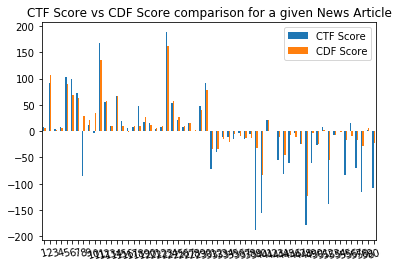

In [32]:
data = {'CTF Score': [v for (k,v) in CTF_Score_lst], 'CDF Score': [CDF_Score[k] for (k,v) in CTF_Score_lst]}
index = [k+1 for (k,v) in CTF_Score_lst]
prediction_plt = pd.DataFrame(data = data, index = index)
prediction_plt.plot.bar(rot = 15, title = "CTF Score vs CDF Score comparison for a given News Article")
plot.show(block = True)

In [33]:
# Finding Accuracy for Unigram Frequency Model

# Calculating Accuracy based on CTF Score

def accuracy_based_on_CTF_Score(lst1, lst2):
    N = 0
    for i in range(len(lst1)):
        if lst1[i] == lst2[i]:
            N += 1
    return [100 * N/float(len(lst1)), len(lst1) - N, len(lst1)]

print("Accuracy based on CTF Score is {} % and number of inaccuracies were {} out of a total of {} entries used for testing purpose".format(accuracy_based_on_CTF_Score(l, pred_CTF_Score)[0], accuracy_based_on_CTF_Score(l, pred_CTF_Score)[1], accuracy_based_on_CTF_Score(l, pred_CTF_Score)[2]))

# Calculating Accuracy based on CDF Score

def accuracy_based_on_CDF_Score(lst1, lst2):
    N = 0
    for i in range(len(lst1)):
        if lst1[i] == lst2[i]:
            N += 1
    return [100 * N/float(len(lst1)), len(lst1) - N, len(lst1)]

print("Accuracy based on CDF Score is {} % and number of inaccuracies were {} out of a total of {} entries used for testing purpose".format(accuracy_based_on_CDF_Score(l, pred_CDF_Score)[0], accuracy_based_on_CDF_Score(l, pred_CDF_Score)[1], accuracy_based_on_CDF_Score(l, pred_CDF_Score)[2]))

Accuracy based on CTF Score is 88.33333333333333 % and number of inaccuracies were 7 out of a total of 60 entries used for testing purpose
Accuracy based on CDF Score is 93.33333333333333 % and number of inaccuracies were 4 out of a total of 60 entries used for testing purpose
